In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# path = '/content/drive/MyDrive/lab 4.1/image processing/Lenna_(test_image).png'
path = 'C:\\Users\shakil\\Desktop\\academic lab\\images\\Lenna_(test_image).png'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (200, 200))

In [4]:
height, weight = image.shape

In [5]:
kernal = np.array(([0,-1,0], [-1,5,-1], [0,-1,0]), np.float32)

In [6]:
# if image size is N*N
# this matrixKernal will be N^2 by N^2
matrixKernal = np.zeros((height**2, weight**2), np.float32)

In [7]:
# creating the first row
# will use this row to create all other row
for i in range(kernal.shape[0]):
  for j in range(kernal.shape[1]):
    matrixKernal[0][i*height + j] = kernal[i][j]

In [8]:
# roll()
  # do a right shift

for i in range(1, height**2):
  matrixKernal[i] = np.roll(matrixKernal[i-1], shift=1)

In [9]:
# reshape the image so that it can be multiply with matrixKernal
# 2d to 1d then 2d
matImage = image.flatten()
matImage = matImage.reshape(height*weight, 1)

In [10]:
# matrix multiplication
result = np.matmul(matrixKernal, matImage)

In [11]:
# 1d to 2d
result = np.resize(result, (height, weight))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


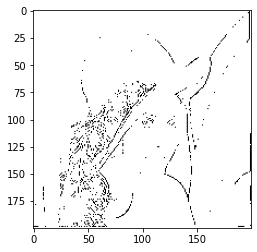

In [12]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))